# TIFO & IMED final project

functions :
- [x] read image and predictions 
- [ ] first prediction function
- [ ] score function

### Imports

In [11]:
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelmax, argrelmin
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Utility functions

In [12]:
def read_img(img_file):
    img = cv2.imread(img_file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

In [13]:
def plot_pred(img, pred):
    plt.imshow(img, cmap='gray')
    plt.scatter(pred.x, pred.y)

In [129]:
img = read_img('data/ex04.jpg')
true = pd.read_csv('data/ex04.csv', names=['y', 'x'])

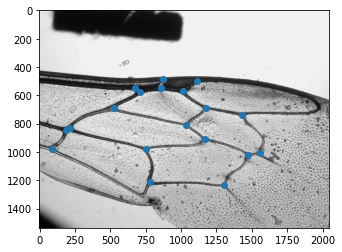

In [15]:
plot_pred(img, true)

In [156]:
def adaptive_global_thresholding(img):
    
    # Downsize image to speedup computations
    scale_percent = 0.1
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    # Estimate the density of the image histogram
    X = resized.flatten().reshape((-1, 1))
    X_plot = np.linspace(0, 255, 1000)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(X)
    log_dens = kde.score_samples(X_plot)

    # Find the peaks and valleys of the signal and choose the first valley as threshold
    peak_i = argrelmax(np.exp(log_dens))
    valley_i = argrelmin(np.exp(log_dens))
    threshold_i = valley_i[0][0]

    grad = np.gradient(np.exp(log_dens))
    std = np.std(grad)
    threshold_i = np.argwhere((grad <= -std) | (grad >= std))[0, 0]

    threshold = X_plot[threshold_i, 0]
    print(f'Threshold: {threshold}')

    plt.figure(figsize=(30, 5))
    
    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    
    plt.subplot(142)
    plt.plot(X_plot[:threshold_i, 0], np.exp(log_dens)[:threshold_i], '#ff8c00', X_plot[threshold_i:, 0], np.exp(log_dens)[threshold_i:], '#0073ff')
    plt.scatter(X_plot[peak_i], np.exp(log_dens)[peak_i], fc='#00ff00')
    plt.scatter(X_plot[valley_i], np.exp(log_dens)[valley_i], fc='#ff0000')
    
    plt.subplot(143)
    #plt.plot(X_plot[:threshold_i, 0], np.exp(log_dens)[:threshold_i], '#ff8c00', X_plot[threshold_i:, 0], np.exp(log_dens)[threshold_i:], '#0073ff')
    #plt.scatter(X_plot[peak_i], np.exp(log_dens)[peak_i], fc='#00ff00')
    plt.scatter(X_plot[threshold_i], grad[threshold_i], fc='#ff0000')

    print(np.std(grad))
    #print(X_plot[split_i, 0])
    plt.plot(X_plot[:, 0], grad)
    #plt.hist(resized.flatten(), bins=256)

    plt.subplot(144)
    filtered = img.copy()
    filtered[img > 125] = 255
    plt.imshow(filtered, cmap='gray')

Threshold: 92.65765765765767
0.00015868487751851838


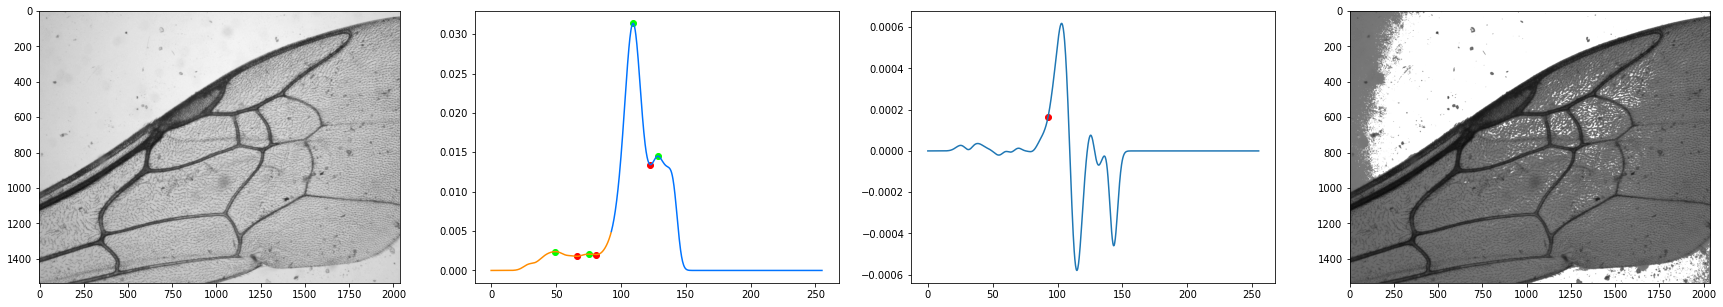

In [157]:
adaptive_global_thresholding(read_img('data/ex03.jpg'))

In [77]:
np.argwhere((img > 50) | (img < 60))

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [1535, 2045],
       [1535, 2046],
       [1535, 2047]])